# Import the necessary packages

In [1]:
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dropout
from keras.layers.core import Dense
from keras import backend as K
from keras.utils import plot_model
from keras.models import model_from_yaml
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.preprocessing.image import img_to_array
from keras.models import load_model
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from imutils import paths
import numpy as np
import random
import cv2
import os
import pydot
import graphviz
import numpy as np
import imutils
import pickle
from IPython.display import SVG


Using TensorFlow backend.


# Model Architecture

In [2]:

#In this part we have the architecture of the classification model derived from VGG
class SmallerVGGNet:
    @staticmethod
    def build(width, height, depth, classes, finalAct="softmax"):
        # initialize the model along with the input shape 
        # "channels last" and the channels dimension itself
        model = Sequential()
        inputShape = (height, width, depth)
        chanDim = -1
        # if we are using "channels first", update the input shape
        # and channels dimension
        #this is used to set the depth(number of channels) in the input shape
        #in tensorflow it's the last while in theano it's the first
        if K.image_data_format() == "channels_first":
            inputShape = (depth, height, width)
            chanDim = 1
        #First part of the model 
        model.add(Conv2D(32, (3, 3), padding="same",
             input_shape=inputShape))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(MaxPooling2D(pool_size=(3, 3)))
        model.add(Dropout(0.25))
        #Second part of the model 
        model.add(Conv2D(64, (3, 3), padding="same",
              input_shape=inputShape))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(Conv2D(64, (3, 3), padding="same",
             input_shape=inputShape))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.25))
         #Third part of the model 
        model.add(Conv2D(128, (3, 3), padding="same",
             input_shape=inputShape))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(Conv2D(128, (3, 3), padding="same",
             input_shape=inputShape))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.25))
        #At last we add a dense layer and the activation function
        model.add(Flatten())
        model.add(Dense(1024))
        model.add(Activation("relu"))
        model.add(BatchNormalization())
        model.add(Dropout(0.5))
        model.add(Dense(classes))
        model.add(Activation(finalAct))
        # return the constructed network architecture
        return model

# Model Training

In [3]:
#number of epochs the model should be trained one 
EPOCHS = 20
#learning rate
INIT_LR = 1e-3
#Batch size
BS = 32
#Input dimensions
IMAGE_DIMS = (96, 96, 3)
#Input folder
INPUT_FOLDER = './data'

In [4]:
imagePaths= os.listdir(INPUT_FOLDER)
# grab the image paths and randomly shuffle them
print("[INFO] loading images...")
imagePaths = sorted(list(paths.list_images(INPUT_FOLDER)))
random.seed(42)
random.shuffle(imagePaths)

[INFO] loading images...


In [5]:
#the data will be stored here
data = []
#the labels of the fruits will be stored here
labels = []
# loop over the input images
for imagePath in imagePaths:
   # load the image, pre-process it, and store it in the data list
    image = cv2.imread(imagePath)
    print(imagePath)
    image = cv2.resize(image, (IMAGE_DIMS[1], IMAGE_DIMS[0]))
    image = img_to_array(image)
    data.append(image)
    x = image.reshape((1,) + image.shape)
    # extract set of class labels from the image path and update the
    # labels list
    l = label = imagePath.split(os.path.sep)[-2].split("_")
    labels.append(l)

# scale the raw pixel intensities to the range [0, 1]
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)




./data\Cherry\r_222_100.jpg
./data\Peach\r_108_100.jpg
./data\Grapefruit\145_100.jpg
./data\Mandarine\33_100.jpg
./data\Plum\r_23_100.jpg
./data\Pear\242_100.jpg
./data\Lemon\254_100.jpg
./data\Orange\120_100.jpg
./data\Pineapple\160_100.jpg
./data\Strawberry\24_100.jpg
./data\Clementine\r_7_100.jpg
./data\Grapefruit\r_162_100.jpg
./data\Clementine\r_141_100.jpg
./data\Pineapple\r_314_100.jpg
./data\Cherry\153_100.jpg
./data\Maracuja\325_100.jpg
./data\Peach\308_100.jpg
./data\Orange\257_100.jpg
./data\Grape\193_100.jpg
./data\Clementine\223_100.jpg
./data\Banana\138_100.jpg
./data\Cherry\r_208_100.jpg
./data\Cherry\181_100.jpg
./data\Pineapple\93_100.jpg
./data\Raspberry\130_100.jpg
./data\Papaya\r_275_100.jpg
./data\Grape\r_311_100.jpg
./data\Plum\195_100.jpg
./data\Pear\16_100.jpg
./data\Apricot\r_150_100.jpg
./data\Maracuja\r_140_100.jpg
./data\Maracuja\r_285_100.jpg
./data\Banana\325_100.jpg
./data\Grape\179_100.jpg
./data\Maracuja\101_100.jpg
./data\Cocos\r_287_100.jpg
./data\Ras

./data\Maracuja\80_100.jpg
./data\Plum\r_222_100.jpg
./data\Mango\r_310_100.jpg
./data\Kiwi\r_272_100.jpg
./data\Maracuja\r_2_100.jpg
./data\Pineapple\168_100.jpg
./data\Raspberry\r_183_100.jpg
./data\Clementine\215_100.jpg
./data\Grapefruit\196_100.jpg
./data\Pineapple\314_100.jpg
./data\PassionFruit\r_44_100.jpg
./data\Mango\197_100.jpg
./data\Maracuja\r_323_100.jpg
./data\Grape\r_246_100.jpg
./data\Cactus\42_100.jpg
./data\Strawberry\r_179_100.jpg
./data\Raspberry\r_191_100.jpg
./data\PassionFruit\r_32_100.jpg
./data\Papaya\101_100.jpg
./data\Pear\r_265_100.jpg
./data\Clementine\r_147_100.jpg
./data\Avocado\207_100.jpg
./data\Peach\r_320_100.jpg
./data\Pomegranate\236_100.jpg
./data\Avocado\93_100.jpg
./data\Maracuja\r_26_100.jpg
./data\Quince\203_100.jpg
./data\Strawberry\306_100.jpg
./data\Pineapple\r_16_100.jpg
./data\Apricot\r_251_100.jpg
./data\Pineapple\112_100.jpg
./data\Grape\190_100.jpg
./data\Maracuja\50_100.jpg
./data\Peach\280_100.jpg
./data\Mango\r_125_100.jpg
./data\Ki

./data\Mandarine\r_181_100.jpg
./data\Strawberry\r_29_100.jpg
./data\Pear\141_100.jpg
./data\Strawberry\r_295_100.jpg
./data\Orange\293_100.jpg
./data\Strawberry\r_140_100.jpg
./data\Kiwi\100_100.jpg
./data\Quince\r_274_100.jpg
./data\Strawberry\266_100.jpg
./data\Avocado\r_316_100.jpg
./data\Banana\62_100.jpg
./data\Cocos\221_100.jpg
./data\Cocos\r_33_100.jpg
./data\Avocado\r_238_100.jpg
./data\Apple\14_100.jpg
./data\Pineapple\165_100.jpg
./data\Cactus\322_100.jpg
./data\Banana\r_144_100.jpg
./data\Peach\138_100.jpg
./data\Papaya\132_100.jpg
./data\Carambula\r_146_100.jpg
./data\Plum\152_100.jpg
./data\Apricot\169_100.jpg
./data\Apricot\161_100.jpg
./data\Cactus\r_132_100.jpg
./data\PassionFruit\179_100.jpg
./data\Clementine\21_100.jpg
./data\Apricot\318_100.jpg
./data\Carambula\r_324_100.jpg
./data\Papaya\106_100.jpg
./data\Apricot\233_100.jpg
./data\Peach\r_116_100.jpg
./data\Pineapple\125_100.jpg
./data\Strawberry\r_204_100.jpg
./data\Banana\177_100.jpg
./data\PassionFruit\76_100.

./data\Clementine\255_100.jpg
./data\Mango\r_195_100.jpg
./data\Quince\r_19_100.jpg
./data\Lemon\101_100.jpg
./data\Pineapple\65_100.jpg
./data\Grape\r_7_100.jpg
./data\PassionFruit\r_201_100.jpg
./data\Cactus\267_100.jpg
./data\Kiwi\159_100.jpg
./data\PassionFruit\r_117_100.jpg
./data\Apricot\r_11_100.jpg
./data\Orange\r_138_100.jpg
./data\Raspberry\r_44_100.jpg
./data\PassionFruit\86_100.jpg
./data\Papaya\r_1_100.jpg
./data\Cactus\r_8_100.jpg
./data\Apple\296_100.jpg
./data\Grapefruit\295_100.jpg
./data\Mango\207_100.jpg
./data\Cherry\213_100.jpg
./data\Cherry\r_215_100.jpg
./data\Apple\r_24_100.jpg
./data\Carambula\260_100.jpg
./data\Cherry\r_140_100.jpg
./data\Papaya\218_100.jpg
./data\Plum\r_192_100.jpg
./data\Carambula\r_99_100.jpg
./data\Carambula\r_284_100.jpg
./data\Cactus\r_95_100.jpg
./data\Strawberry\r_257_100.jpg
./data\Pineapple\132_100.jpg
./data\Lemon\159_100.jpg
./data\Clementine\r_315_100.jpg
./data\Kiwi\r_173_100.jpg
./data\Mandarine\r_204_100.jpg
./data\Apricot\r_20

./data\Grapefruit\286_100.jpg
./data\Plum\r_111_100.jpg
./data\Strawberry\r_232_100.jpg
./data\Kiwi\r_27_100.jpg
./data\Peach\1_100.jpg
./data\Apple\r_166_100.jpg
./data\Avocado\268_100.jpg
./data\Banana\r_271_100.jpg
./data\Avocado\244_100.jpg
./data\Mango\112_100.jpg
./data\Cherry\r_263_100.jpg
./data\Peach\261_100.jpg
./data\Carambula\r_107_100.jpg
./data\Clementine\19_100.jpg
./data\Pineapple\287_100.jpg
./data\Avocado\62_100.jpg
./data\Raspberry\r_319_100.jpg
./data\Peach\24_100.jpg
./data\Maracuja\r_38_100.jpg
./data\Apple\253_100.jpg
./data\Pear\r_282_100.jpg
./data\Banana\76_100.jpg
./data\Pineapple\244_100.jpg
./data\Clementine\r_252_100.jpg
./data\Banana\r_257_100.jpg
./data\Apple\r_291_100.jpg
./data\Carambula\256_100.jpg
./data\Cocos\141_100.jpg
./data\Cocos\91_100.jpg
./data\Kiwi\20_100.jpg
./data\Lemon\250_100.jpg
./data\Orange\188_100.jpg
./data\Papaya\r_277_100.jpg
./data\Grapefruit\289_100.jpg
./data\Mandarine\315_100.jpg
./data\Cherry\r_179_100.jpg
./data\Lemon\208_10

./data\Raspberry\168_100.jpg
./data\Raspberry\r_294_100.jpg
./data\Apple\163_100.jpg
./data\Carambula\r_312_100.jpg
./data\Plum\r_178_100.jpg
./data\Papaya\r_315_100.jpg
./data\Maracuja\326_100.jpg
./data\Quince\106_100.jpg
./data\Grapefruit\20_100.jpg
./data\Clementine\15_100.jpg
./data\Grape\r_293_100.jpg
./data\PassionFruit\245_100.jpg
./data\Apple\81_100.jpg
./data\Carambula\r_119_100.jpg
./data\Plum\260_100.jpg
./data\Cherry\r_200_100.jpg
./data\Apple\r_214_100.jpg
./data\Plum\102_100.jpg
./data\Apple\r_64_100.jpg
./data\Avocado\r_28_100.jpg
./data\Apple\76_100.jpg
./data\Pear\r_110_100.jpg
./data\Carambula\305_100.jpg
./data\PassionFruit\r_177_100.jpg
./data\Mandarine\166_100.jpg
./data\Quince\r_196_100.jpg
./data\Cherry\r_122_100.jpg
./data\Cactus\r_67_100.jpg
./data\PassionFruit\r_28_100.jpg
./data\Mandarine\288_100.jpg
./data\Strawberry\r_154_100.jpg
./data\Peach\260_100.jpg
./data\PassionFruit\293_100.jpg
./data\PassionFruit\r_239_100.jpg
./data\Cocos\255_100.jpg
./data\Cactu

./data\Pineapple\r_234_100.jpg
./data\Grapefruit\26_100.jpg
./data\Carambula\r_257_100.jpg
./data\Strawberry\r_190_100.jpg
./data\Apple\r_89_100.jpg
./data\Apricot\241_100.jpg
./data\Pear\201_100.jpg
./data\Maracuja\299_100.jpg
./data\Avocado\305_100.jpg
./data\Peach\r_28_100.jpg
./data\Strawberry\167_100.jpg
./data\Avocado\r_168_100.jpg
./data\Peach\198_100.jpg
./data\PassionFruit\312_100.jpg
./data\Avocado\204_100.jpg
./data\Quince\r_199_100.jpg
./data\Kiwi\r_122_100.jpg
./data\Cherry\10_100.jpg
./data\Mandarine\114_100.jpg
./data\Plum\r_26_100.jpg
./data\Quince\275_100.jpg
./data\Apple\r_117_100.jpg
./data\Banana\117_100.jpg
./data\PassionFruit\31_100.jpg
./data\Carambula\r_162_100.jpg
./data\Cactus\143_100.jpg
./data\Lemon\156_100.jpg
./data\Quince\133_100.jpg
./data\Cherry\r_114_100.jpg
./data\Cherry\r_115_100.jpg
./data\Grape\r_277_100.jpg
./data\Plum\r_317_100.jpg
./data\Lemon\231_100.jpg
./data\Cocos\r_22_100.jpg
./data\Mango\242_100.jpg
./data\Papaya\r_217_100.jpg
./data\Apple

./data\Quince\r_18_100.jpg
./data\Strawberry\r_188_100.jpg
./data\Mandarine\r_237_100.jpg
./data\Banana\r_313_100.jpg
./data\Cocos\117_100.jpg
./data\Pear\172_100.jpg
./data\Apricot\273_100.jpg
./data\Avocado\r_190_100.jpg
./data\Avocado\r_226_100.jpg
./data\Cactus\231_100.jpg
./data\Lemon\164_100.jpg
./data\Orange\261_100.jpg
./data\Raspberry\139_100.jpg
./data\Avocado\295_100.jpg
./data\Peach\r_237_100.jpg
./data\Cactus\r_17_100.jpg
./data\Apple\218_100.jpg
./data\Grapefruit\107_100.jpg
./data\Lemon\298_100.jpg
./data\Cocos\26_100.jpg
./data\Kiwi\130_100.jpg
./data\Pineapple\257_100.jpg
./data\Maracuja\r_309_100.jpg
./data\Cocos\r_139_100.jpg
./data\Raspberry\r_6_100.jpg
./data\Mango\221_100.jpg
./data\Grape\r_316_100.jpg
./data\Peach\r_114_100.jpg
./data\Avocado\8_100.jpg
./data\Peach\302_100.jpg
./data\Maracuja\203_100.jpg
./data\Grape\r_205_100.jpg
./data\Peach\101_100.jpg
./data\Grapefruit\r_139_100.jpg
./data\Apple\r_325_100.jpg
./data\Avocado\r_166_100.jpg
./data\Mango\210_100.

./data\Peach\r_176_100.jpg
./data\PassionFruit\r_265_100.jpg
./data\Orange\r_104_100.jpg
./data\Cactus\45_100.jpg
./data\Mandarine\109_100.jpg
./data\Cocos\r_295_100.jpg
./data\Strawberry\r_108_100.jpg
./data\Cocos\123_100.jpg
./data\Apple\r_168_100.jpg
./data\Orange\r_156_100.jpg
./data\Maracuja\r_63_100.jpg
./data\Pear\24_100.jpg
./data\Avocado\223_100.jpg
./data\Avocado\291_100.jpg
./data\Peach\r_239_100.jpg
./data\Apricot\246_100.jpg
./data\Apricot\r_21_100.jpg
./data\Apple\84_100.jpg
./data\Strawberry\r_24_100.jpg
./data\Carambula\247_100.jpg
./data\Cocos\r_47_100.jpg
./data\Mango\252_100.jpg
./data\Cherry\159_100.jpg
./data\Cherry\27_100.jpg
./data\Strawberry\15_100.jpg
./data\Papaya\r_176_100.jpg
./data\Avocado\r_22_100.jpg
./data\Maracuja\r_275_100.jpg
./data\Raspberry\r_243_100.jpg
./data\Cherry\r_100_100.jpg
./data\PassionFruit\281_100.jpg
./data\Avocado\r_38_100.jpg
./data\Lemon\178_100.jpg
./data\Mango\41_100.jpg
./data\Lemon\201_100.jpg
./data\Pear\r_198_100.jpg
./data\App

./data\PassionFruit\16_100.jpg
./data\Pineapple\251_100.jpg
./data\Mandarine\r_163_100.jpg
./data\Mandarine\86_100.jpg
./data\Mandarine\r_230_100.jpg
./data\Mandarine\r_186_100.jpg
./data\Kiwi\r_13_100.jpg
./data\Strawberry\287_100.jpg
./data\Plum\240_100.jpg
./data\PassionFruit\204_100.jpg
./data\Papaya\214_100.jpg
./data\Kiwi\18_100.jpg
./data\Avocado\219_100.jpg
./data\Kiwi\284_100.jpg
./data\Pear\r_223_100.jpg
./data\Avocado\r_324_100.jpg
./data\Orange\11_100.jpg
./data\Orange\r_173_100.jpg
./data\Avocado\68_100.jpg
./data\Lemon\283_100.jpg
./data\Apple\r_262_100.jpg
./data\Apple\107_100.jpg
./data\Pomegranate\175_100.jpg
./data\Mango\60_100.jpg
./data\Pear\243_100.jpg
./data\Grape\120_100.jpg
./data\Clementine\r_77_100.jpg
./data\Avocado\201_100.jpg
./data\Clementine\r_242_100.jpg
./data\Cherry\r_218_100.jpg
./data\PassionFruit\181_100.jpg
./data\Kiwi\242_100.jpg
./data\Apple\r_41_100.jpg
./data\Apple\r_44_100.jpg
./data\Mango\r_29_100.jpg
./data\Kiwi\175_100.jpg
./data\Banana\r_0

./data\Peach\307_100.jpg
./data\Banana\85_100.jpg
./data\Mandarine\13_100.jpg
./data\Mandarine\r_277_100.jpg
./data\Plum\175_100.jpg
./data\Carambula\251_100.jpg
./data\Avocado\118_100.jpg
./data\Peach\r_25_100.jpg
./data\Pineapple\50_100.jpg
./data\Mandarine\r_3_100.jpg
./data\Cherry\31_100.jpg
./data\Mandarine\r_144_100.jpg
./data\Pear\106_100.jpg
./data\Plum\110_100.jpg
./data\Raspberry\128_100.jpg
./data\Carambula\r_134_100.jpg
./data\Cactus\r_48_100.jpg
./data\Carambula\131_100.jpg
./data\Plum\122_100.jpg
./data\PassionFruit\r_148_100.jpg
./data\Grape\299_100.jpg
./data\Kiwi\233_100.jpg
./data\Carambula\77_100.jpg
./data\Kiwi\128_100.jpg
./data\Grapefruit\260_100.jpg
./data\Maracuja\228_100.jpg
./data\Banana\323_100.jpg
./data\Cactus\r_66_100.jpg
./data\Carambula\48_100.jpg
./data\Peach\223_100.jpg
./data\Orange\r_226_100.jpg
./data\Grapefruit\14_100.jpg
./data\Raspberry\r_226_100.jpg
./data\Orange\r_248_100.jpg
./data\Clementine\131_100.jpg
./data\Cactus\321_100.jpg
./data\Aprico

./data\Cherry\r_23_100.jpg
./data\Grape\r_326_100.jpg
./data\Pear\r_271_100.jpg
./data\Grape\r_294_100.jpg
./data\Papaya\r_214_100.jpg
./data\Quince\89_100.jpg
./data\Avocado\283_100.jpg
./data\Raspberry\r_159_100.jpg
./data\Clementine\262_100.jpg
./data\Kiwi\r_280_100.jpg
./data\Avocado\r_135_100.jpg
./data\Maracuja\286_100.jpg
./data\Peach\158_100.jpg
./data\Orange\254_100.jpg
./data\Avocado\r_178_100.jpg
./data\Peach\r_159_100.jpg
./data\Cherry\r_229_100.jpg
./data\Avocado\193_100.jpg
./data\Clementine\r_165_100.jpg
./data\Kiwi\r_16_100.jpg
./data\PassionFruit\38_100.jpg
./data\Cherry\r_198_100.jpg
./data\Quince\r_290_100.jpg
./data\Banana\r_285_100.jpg
./data\Plum\r_292_100.jpg
./data\Plum\r_140_100.jpg
./data\PassionFruit\r_69_100.jpg
./data\Plum\r_117_100.jpg
./data\Mango\188_100.jpg
./data\PassionFruit\99_100.jpg
./data\Plum\r_114_100.jpg
./data\Apple\r_136_100.jpg
./data\Lemon\31_100.jpg
./data\Maracuja\r_127_100.jpg
./data\Grape\57_100.jpg
./data\Avocado\122_100.jpg
./data\Str

./data\Apple\r_221_100.jpg
./data\Mango\227_100.jpg
./data\Avocado\22_100.jpg
./data\Mandarine\59_100.jpg
./data\Raspberry\r_211_100.jpg
./data\Cocos\76_100.jpg
./data\Orange\r_205_100.jpg
./data\Apricot\r_105_100.jpg
./data\Kiwi\201_100.jpg
./data\Mango\234_100.jpg
./data\Grapefruit\r_228_100.jpg
./data\Mango\r_60_100.jpg
./data\Cherry\r_160_100.jpg
./data\PassionFruit\r_124_100.jpg
./data\Pear\14_100.jpg
./data\Cactus\r_102_100.jpg
./data\Avocado\86_100.jpg
./data\Strawberry\r_242_100.jpg
./data\Apple\74_100.jpg
./data\Maracuja\r_67_100.jpg
./data\Pear\295_100.jpg
./data\Peach\r_133_100.jpg
./data\Kiwi\r_146_100.jpg
./data\Cherry\r_303_100.jpg
./data\Plum\r_120_100.jpg
./data\Maracuja\r_157_100.jpg
./data\Cherry\r_158_100.jpg
./data\Pomegranate\25_100.jpg
./data\Orange\r_21_100.jpg
./data\Pomegranate\139_100.jpg
./data\Lemon\303_100.jpg
./data\Grape\r_247_100.jpg
./data\Plum\r_252_100.jpg
./data\Strawberry\126_100.jpg
./data\Raspberry\r_0_100.jpg
./data\PassionFruit\r_256_100.jpg
./d

./data\Papaya\r_145_100.jpg
./data\Raspberry\r_78_100.jpg
./data\Avocado\276_100.jpg
./data\Strawberry\r_229_100.jpg
./data\Pineapple\r_297_100.jpg
./data\Grape\r_140_100.jpg
./data\Peach\r_263_100.jpg
./data\Carambula\23_100.jpg
./data\Cactus\r_221_100.jpg
./data\Apple\63_100.jpg
./data\Cocos\r_299_100.jpg
./data\Mango\109_100.jpg
./data\Avocado\r_145_100.jpg
./data\Carambula\r_152_100.jpg
./data\Kiwi\r_250_100.jpg
./data\Strawberry\r_293_100.jpg
./data\Orange\r_16_100.jpg
./data\Strawberry\r_301_100.jpg
./data\Kiwi\116_100.jpg
./data\Mandarine\85_100.jpg
./data\Kiwi\r_149_100.jpg
./data\Lemon\106_100.jpg
./data\Orange\123_100.jpg
./data\Plum\r_198_100.jpg
./data\Kiwi\218_100.jpg
./data\PassionFruit\215_100.jpg
./data\Cactus\216_100.jpg
./data\Papaya\259_100.jpg
./data\Quince\r_245_100.jpg
./data\Quince\98_100.jpg
./data\Plum\r_257_100.jpg
./data\Pear\12_100.jpg
./data\Maracuja\282_100.jpg
./data\Pomegranate\206_100.jpg
./data\Raspberry\r_65_100.jpg
./data\Pomegranate\245_100.jpg
./da

./data\Mango\88_100.jpg
./data\Apple\147_100.jpg
./data\Apricot\115_100.jpg
./data\Orange\295_100.jpg
./data\Maracuja\r_150_100.jpg
./data\Pineapple\r_240_100.jpg
./data\Carambula\r_262_100.jpg
./data\Mandarine\10_100.jpg
./data\Mandarine\8_100.jpg
./data\Mango\r_80_100.jpg
./data\Apricot\r_282_100.jpg
./data\Mandarine\r_263_100.jpg
./data\Grape\172_100.jpg
./data\Banana\r_104_100.jpg
./data\Mango\163_100.jpg
./data\Avocado\294_100.jpg
./data\Strawberry\12_100.jpg
./data\Carambula\r_154_100.jpg
./data\PassionFruit\r_154_100.jpg
./data\Cherry\267_100.jpg
./data\Mandarine\23_100.jpg
./data\Cactus\107_100.jpg
./data\Mandarine\168_100.jpg
./data\Raspberry\46_100.jpg
./data\Carambula\123_100.jpg
./data\Papaya\r_158_100.jpg
./data\Grape\254_100.jpg
./data\Apple\r_147_100.jpg
./data\Raspberry\r_186_100.jpg
./data\Quince\r_211_100.jpg
./data\Apricot\r_311_100.jpg
./data\Raspberry\66_100.jpg
./data\Mandarine\321_100.jpg
./data\Apricot\r_18_100.jpg
./data\Cactus\r_32_100.jpg
./data\Cherry\170_10

./data\Cocos\r_146_100.jpg
./data\Maracuja\r_77_100.jpg
./data\Mango\31_100.jpg
./data\Mandarine\50_100.jpg
./data\Banana\50_100.jpg
./data\Clementine\r_23_100.jpg
./data\Kiwi\120_100.jpg
./data\Apple\154_100.jpg
./data\Raspberry\r_293_100.jpg
./data\Cherry\r_116_100.jpg
./data\Papaya\226_100.jpg
./data\Banana\226_100.jpg
./data\Strawberry\276_100.jpg
./data\Carambula\r_42_100.jpg
./data\Mandarine\280_100.jpg
./data\Maracuja\r_236_100.jpg
./data\Cherry\r_111_100.jpg
./data\Raspberry\r_318_100.jpg
./data\Clementine\130_100.jpg
./data\Maracuja\269_100.jpg
./data\Strawberry\292_100.jpg
./data\Cherry\r_123_100.jpg
./data\Kiwi\192_100.jpg
./data\Grapefruit\r_259_100.jpg
./data\Clementine\142_100.jpg
./data\Cherry\272_100.jpg
./data\Mandarine\r_166_100.jpg
./data\Mandarine\r_138_100.jpg
./data\Pineapple\r_78_100.jpg
./data\Raspberry\r_259_100.jpg
./data\Cherry\r_204_100.jpg
./data\Mandarine\r_296_100.jpg
./data\Clementine\r_131_100.jpg
./data\Avocado\139_100.jpg
./data\Strawberry\157_100.jpg

./data\Apple\314_100.jpg
./data\Pear\224_100.jpg
./data\Cocos\r_52_100.jpg
./data\Mango\128_100.jpg
./data\Cherry\126_100.jpg
./data\Carambula\192_100.jpg
./data\Pineapple\r_86_100.jpg
./data\Grapefruit\r_189_100.jpg
./data\Plum\r_1_100.jpg
./data\Apple\145_100.jpg
./data\Pineapple\r_247_100.jpg
./data\Mandarine\r_213_100.jpg
./data\Plum\124_100.jpg
./data\Cactus\81_100.jpg
./data\Cactus\r_150_100.jpg
./data\Lemon\2_100.jpg
./data\Banana\r_189_100.jpg
./data\Cactus\165_100.jpg
./data\Orange\24_100.jpg
./data\Avocado\r_269_100.jpg
./data\Plum\r_223_100.jpg
./data\Orange\r_247_100.jpg
./data\Pineapple\r_146_100.jpg
./data\Pear\r_144_100.jpg
./data\PassionFruit\26_100.jpg
./data\Raspberry\59_100.jpg
./data\PassionFruit\r_68_100.jpg
./data\Pear\r_201_100.jpg
./data\Quince\117_100.jpg
./data\Orange\133_100.jpg
./data\Pineapple\299_100.jpg
./data\Plum\150_100.jpg
./data\Plum\r_19_100.jpg
./data\Apricot\r_169_100.jpg
./data\Papaya\237_100.jpg
./data\Mandarine\180_100.jpg
./data\Apple\277_100.

./data\PassionFruit\r_155_100.jpg
./data\Cherry\106_100.jpg
./data\Raspberry\32_100.jpg
./data\Papaya\215_100.jpg
./data\Orange\r_176_100.jpg
./data\Pineapple\r_184_100.jpg
./data\Mango\r_164_100.jpg
./data\Apple\r_103_100.jpg
./data\Apple\259_100.jpg
./data\Kiwi\163_100.jpg
./data\Strawberry\224_100.jpg
./data\Peach\197_100.jpg
./data\Clementine\r_259_100.jpg
./data\Plum\128_100.jpg
./data\Pomegranate\186_100.jpg
./data\Quince\91_100.jpg
./data\Cocos\251_100.jpg
./data\Quince\r_109_100.jpg
./data\Clementine\r_116_100.jpg
./data\Strawberry\164_100.jpg
./data\Pomegranate\10_100.jpg
./data\Plum\r_151_100.jpg
./data\Clementine\r_320_100.jpg
./data\Carambula\r_306_100.jpg
./data\Banana\270_100.jpg
./data\Carambula\r_56_100.jpg
./data\Grapefruit\140_100.jpg
./data\Peach\275_100.jpg
./data\Apple\240_100.jpg
./data\Apricot\315_100.jpg
./data\Strawberry\190_100.jpg
./data\Grapefruit\21_100.jpg
./data\Papaya\r_299_100.jpg
./data\Quince\85_100.jpg
./data\Raspberry\r_286_100.jpg
./data\Mandarine\

./data\Cherry\r_133_100.jpg
./data\Papaya\r_135_100.jpg
./data\Grapefruit\r_311_100.jpg
./data\Clementine\176_100.jpg
./data\Grapefruit\r_104_100.jpg
./data\PassionFruit\r_51_100.jpg
./data\Grape\132_100.jpg
./data\Quince\r_226_100.jpg
./data\Lemon\140_100.jpg
./data\Apricot\299_100.jpg
./data\Maracuja\256_100.jpg
./data\PassionFruit\r_194_100.jpg
./data\Orange\r_251_100.jpg
./data\Kiwi\r_236_100.jpg
./data\Mango\169_100.jpg
./data\Pineapple\135_100.jpg
./data\Mango\68_100.jpg
./data\Strawberry\165_100.jpg
./data\Pomegranate\151_100.jpg
./data\Plum\162_100.jpg
./data\Cocos\209_100.jpg
./data\Raspberry\r_274_100.jpg
./data\Avocado\r_182_100.jpg
./data\Carambula\r_47_100.jpg
./data\Cocos\252_100.jpg
./data\PassionFruit\220_100.jpg
./data\Plum\r_119_100.jpg
./data\PassionFruit\r_141_100.jpg
./data\Papaya\10_100.jpg
./data\Cocos\158_100.jpg
./data\Pomegranate\231_100.jpg
./data\Apple\r_94_100.jpg
./data\Cactus\r_111_100.jpg
./data\Mandarine\r_218_100.jpg
./data\Apple\r_36_100.jpg
./data\Ki

./data\Pineapple\240_100.jpg
./data\Grapefruit\r_248_100.jpg
./data\Strawberry\206_100.jpg
./data\Raspberry\143_100.jpg
./data\Orange\200_100.jpg
./data\Lemon\128_100.jpg
./data\Pineapple\29_100.jpg
./data\Banana\71_100.jpg
./data\Peach\r_0_100.jpg
./data\Cherry\319_100.jpg
./data\Raspberry\r_180_100.jpg
./data\Banana\r_27_100.jpg
./data\Banana\185_100.jpg
./data\Carambula\r_28_100.jpg
./data\Peach\268_100.jpg
./data\Carambula\r_7_100.jpg
./data\Grapefruit\115_100.jpg
./data\Maracuja\251_100.jpg
./data\PassionFruit\8_100.jpg
./data\Quince\141_100.jpg
./data\Banana\r_153_100.jpg
./data\Cherry\116_100.jpg
./data\Peach\311_100.jpg
./data\Peach\r_286_100.jpg
./data\Cherry\241_100.jpg
./data\Avocado\r_175_100.jpg
./data\Plum\109_100.jpg
./data\Cocos\r_191_100.jpg
./data\Apple\153_100.jpg
./data\Mandarine\144_100.jpg
./data\Raspberry\r_324_100.jpg
./data\Papaya\r_205_100.jpg
./data\Orange\r_285_100.jpg
./data\Mandarine\159_100.jpg
./data\Cherry\r_159_100.jpg
./data\PassionFruit\r_53_100.jpg


./data\Pineapple\225_100.jpg
./data\Banana\r_74_100.jpg
./data\Banana\53_100.jpg
./data\Quince\1_100.jpg
./data\Cocos\r_194_100.jpg
./data\Avocado\r_165_100.jpg
./data\Banana\r_254_100.jpg
./data\Pineapple\80_100.jpg
./data\Grape\r_117_100.jpg
./data\Plum\34_100.jpg
./data\Cactus\r_41_100.jpg
./data\Apricot\263_100.jpg
./data\Grape\165_100.jpg
./data\Carambula\r_298_100.jpg
./data\Orange\125_100.jpg
./data\Grapefruit\r_101_100.jpg
./data\Peach\283_100.jpg
./data\Apple\161_100.jpg
./data\Grapefruit\r_213_100.jpg
./data\Cactus\r_211_100.jpg
./data\Pear\284_100.jpg
./data\Cocos\148_100.jpg
./data\Grapefruit\r_280_100.jpg
./data\Quince\r_302_100.jpg
./data\Clementine\163_100.jpg
./data\Avocado\70_100.jpg
./data\Lemon\211_100.jpg
./data\Papaya\r_181_100.jpg
./data\Pomegranate\210_100.jpg
./data\Cherry\109_100.jpg
./data\Carambula\265_100.jpg
./data\Clementine\r_272_100.jpg
./data\Pineapple\92_100.jpg
./data\Cocos\87_100.jpg
./data\Raspberry\r_245_100.jpg
./data\Cherry\r_104_100.jpg
./data\P

./data\Peach\278_100.jpg
./data\Clementine\r_109_100.jpg
./data\Cocos\r_242_100.jpg
./data\Cocos\r_274_100.jpg
./data\Carambula\r_156_100.jpg
./data\Avocado\r_102_100.jpg
./data\Clementine\r_0_100.jpg
./data\Cocos\r_262_100.jpg
./data\Lemon\26_100.jpg
./data\Cocos\r_221_100.jpg
./data\Pear\r_108_100.jpg
./data\Avocado\r_287_100.jpg
./data\Pear\r_214_100.jpg
./data\Cherry\136_100.jpg
./data\Grapefruit\r_14_100.jpg
./data\Cactus\11_100.jpg
./data\Grape\r_110_100.jpg
./data\Carambula\r_122_100.jpg
./data\PassionFruit\r_29_100.jpg
./data\PassionFruit\r_38_100.jpg
./data\Cocos\49_100.jpg
./data\Mango\164_100.jpg
./data\Papaya\203_100.jpg
./data\Banana\r_182_100.jpg
./data\Grape\198_100.jpg
./data\Grapefruit\157_100.jpg
./data\Peach\17_100.jpg
./data\Avocado\218_100.jpg
./data\Apricot\306_100.jpg
./data\Orange\13_100.jpg
./data\Pomegranate\310_100.jpg
./data\Pineapple\146_100.jpg
./data\Mandarine\272_100.jpg
./data\Grapefruit\r_202_100.jpg
./data\Papaya\r_105_100.jpg
./data\Raspberry\195_100

./data\Cherry\r_142_100.jpg
./data\Maracuja\r_300_100.jpg
./data\Grape\r_264_100.jpg
./data\Kiwi\285_100.jpg
./data\Raspberry\311_100.jpg
./data\Grape\r_107_100.jpg
./data\Grapefruit\195_100.jpg
./data\Mango\r_313_100.jpg
./data\Orange\110_100.jpg
./data\Grape\r_286_100.jpg
./data\Orange\r_261_100.jpg
./data\Quince\r_116_100.jpg
./data\Cocos\r_68_100.jpg
./data\Avocado\r_260_100.jpg
./data\Papaya\258_100.jpg
./data\Banana\r_204_100.jpg
./data\Kiwi\177_100.jpg
./data\Grapefruit\231_100.jpg
./data\PassionFruit\317_100.jpg
./data\Cherry\117_100.jpg
./data\Avocado\r_232_100.jpg
./data\Clementine\r_264_100.jpg
./data\Apricot\r_292_100.jpg
./data\Grape\168_100.jpg
./data\Avocado\156_100.jpg
./data\Maracuja\246_100.jpg
./data\Apricot\r_100_100.jpg
./data\Carambula\r_100_100.jpg
./data\Banana\254_100.jpg
./data\Carambula\r_71_100.jpg
./data\Papaya\288_100.jpg
./data\Cherry\r_240_100.jpg
./data\Carambula\r_13_100.jpg
./data\Cactus\r_259_100.jpg
./data\Cactus\1_100.jpg
./data\Mandarine\r_150_100

./data\Raspberry\r_86_100.jpg
./data\Papaya\309_100.jpg
./data\Avocado\r_299_100.jpg
./data\Apple\70_100.jpg
./data\Papaya\r_189_100.jpg
./data\Banana\55_100.jpg
./data\Grape\r_260_100.jpg
./data\Mango\r_202_100.jpg
./data\Orange\297_100.jpg
./data\Strawberry\216_100.jpg
./data\Mango\r_272_100.jpg
./data\Plum\27_100.jpg
./data\Maracuja\210_100.jpg
./data\Strawberry\r_267_100.jpg
./data\Clementine\260_100.jpg
./data\Mandarine\291_100.jpg
./data\Kiwi\r_296_100.jpg
./data\Pear\r_203_100.jpg
./data\Orange\r_211_100.jpg
./data\Apricot\262_100.jpg
./data\Quince\r_224_100.jpg
./data\Raspberry\r_130_100.jpg
./data\Strawberry\r_12_100.jpg
./data\Plum\r_146_100.jpg
./data\Orange\197_100.jpg
./data\Pear\1_100.jpg
./data\Cactus\r_85_100.jpg
./data\Peach\r_313_100.jpg
./data\Maracuja\82_100.jpg
./data\Orange\r_192_100.jpg
./data\Cactus\r_198_100.jpg
./data\Apple\271_100.jpg
./data\Peach\154_100.jpg
./data\Pomegranate\150_100.jpg
./data\Lemon\166_100.jpg
./data\Grapefruit\r_22_100.jpg
./data\Maracuj

./data\Apple\r_261_100.jpg
./data\Banana\r_136_100.jpg
./data\Mandarine\122_100.jpg
./data\Orange\r_185_100.jpg
./data\Maracuja\294_100.jpg
./data\Pineapple\305_100.jpg
./data\Cocos\r_18_100.jpg
./data\Raspberry\r_208_100.jpg
./data\Kiwi\224_100.jpg
./data\Pineapple\89_100.jpg
./data\Raspberry\r_176_100.jpg
./data\Apple\r_299_100.jpg
./data\Clementine\r_246_100.jpg
./data\Pear\r_131_100.jpg
./data\Cherry\166_100.jpg
./data\Carambula\r_49_100.jpg
./data\PassionFruit\79_100.jpg
./data\Pomegranate\140_100.jpg
./data\Pineapple\285_100.jpg
./data\Quince\r_280_100.jpg
./data\Mandarine\293_100.jpg
./data\Orange\r_20_100.jpg
./data\Grape\r_188_100.jpg
./data\Apricot\r_267_100.jpg
./data\Plum\r_142_100.jpg
./data\Pear\r_315_100.jpg
./data\PassionFruit\49_100.jpg
./data\Plum\229_100.jpg
./data\Papaya\131_100.jpg
./data\Maracuja\r_90_100.jpg
./data\Mandarine\53_100.jpg
./data\Pear\200_100.jpg
./data\Quince\254_100.jpg
./data\Carambula\r_260_100.jpg
./data\Avocado\r_100_100.jpg
./data\Mandarine\r_

./data\Apple\r_196_100.jpg
./data\Carambula\63_100.jpg
./data\Cocos\88_100.jpg
./data\Pear\r_125_100.jpg
./data\Pear\313_100.jpg
./data\Orange\r_145_100.jpg
./data\Grapefruit\r_204_100.jpg
./data\Maracuja\r_93_100.jpg
./data\PassionFruit\101_100.jpg
./data\Maracuja\r_30_100.jpg
./data\Kiwi\205_100.jpg
./data\Plum\r_217_100.jpg
./data\Strawberry\r_135_100.jpg
./data\Peach\r_255_100.jpg
./data\Strawberry\r_10_100.jpg
./data\Papaya\269_100.jpg
./data\Pineapple\140_100.jpg
./data\Strawberry\r_150_100.jpg
./data\Quince\r_94_100.jpg
./data\Raspberry\r_138_100.jpg
./data\Pomegranate\312_100.jpg
./data\Avocado\76_100.jpg
./data\Apricot\r_199_100.jpg
./data\Peach\r_296_100.jpg
./data\PassionFruit\252_100.jpg
./data\Mandarine\r_141_100.jpg
./data\Orange\302_100.jpg
./data\Quince\184_100.jpg
./data\Pear\281_100.jpg
./data\Apple\r_322_100.jpg
./data\Cactus\5_100.jpg
./data\Mango\r_188_100.jpg
./data\Cocos\r_279_100.jpg
./data\Pomegranate\222_100.jpg
./data\Carambula\r_249_100.jpg
./data\Cherry\r_1

./data\Peach\146_100.jpg
./data\Cactus\188_100.jpg
./data\Quince\r_240_100.jpg
./data\Lemon\282_100.jpg
./data\Strawberry\311_100.jpg
./data\Pomegranate\227_100.jpg
./data\Cactus\304_100.jpg
./data\Clementine\r_249_100.jpg
./data\Banana\r_299_100.jpg
./data\Banana\r_183_100.jpg
./data\Raspberry\r_155_100.jpg
./data\Apricot\r_173_100.jpg
./data\Mandarine\r_135_100.jpg
./data\Banana\r_88_100.jpg
./data\Avocado\r_18_100.jpg
./data\Papaya\100_100.jpg
./data\Cocos\38_100.jpg
./data\Peach\31_100.jpg
./data\Grape\148_100.jpg
./data\Grape\197_100.jpg
./data\Grapefruit\125_100.jpg
./data\Carambula\132_100.jpg
./data\Papaya\r_239_100.jpg
./data\Cocos\r_297_100.jpg
./data\Papaya\r_142_100.jpg
./data\Grapefruit\r_304_100.jpg
./data\PassionFruit\r_31_100.jpg
./data\Apricot\r_174_100.jpg
./data\Cherry\258_100.jpg
./data\Cherry\253_100.jpg
./data\Cactus\141_100.jpg
./data\Cactus\r_94_100.jpg
./data\Mango\175_100.jpg
./data\Grapefruit\r_301_100.jpg
./data\Cherry\300_100.jpg
./data\Clementine\28_100.jp

./data\Avocado\174_100.jpg
./data\Apricot\206_100.jpg
./data\Cocos\99_100.jpg
./data\Maracuja\r_242_100.jpg
./data\PassionFruit\r_222_100.jpg
./data\Cherry\r_101_100.jpg
./data\Clementine\182_100.jpg
./data\Apricot\148_100.jpg
./data\Pear\r_267_100.jpg
./data\Pear\r_311_100.jpg
./data\PassionFruit\r_206_100.jpg
./data\Pineapple\303_100.jpg
./data\Mango\267_100.jpg
./data\Plum\190_100.jpg
./data\Avocado\297_100.jpg
./data\Carambula\202_100.jpg
./data\Apple\239_100.jpg
./data\Quince\291_100.jpg
./data\Maracuja\r_24_100.jpg
./data\PassionFruit\282_100.jpg
./data\Pear\r_113_100.jpg
./data\Kiwi\r_304_100.jpg
./data\Mandarine\320_100.jpg
./data\Plum\r_125_100.jpg
./data\Pear\r_222_100.jpg
./data\Raspberry\r_141_100.jpg
./data\Pineapple\r_301_100.jpg
./data\Cherry\r_315_100.jpg
./data\Clementine\r_129_100.jpg
./data\PassionFruit\r_192_100.jpg
./data\Maracuja\209_100.jpg
./data\Mandarine\36_100.jpg
./data\Kiwi\r_213_100.jpg
./data\Pineapple\176_100.jpg
./data\Mandarine\121_100.jpg
./data\Cocos

./data\PassionFruit\r_241_100.jpg
./data\Grape\281_100.jpg
./data\Apple\236_100.jpg
./data\Apple\r_70_100.jpg
./data\Plum\r_296_100.jpg
./data\Carambula\r_22_100.jpg
./data\Orange\251_100.jpg
./data\Mandarine\123_100.jpg
./data\Apple\r_53_100.jpg
./data\Carambula\29_100.jpg
./data\Mandarine\r_228_100.jpg
./data\Plum\r_307_100.jpg
./data\Apple\r_68_100.jpg
./data\Papaya\r_185_100.jpg
./data\Quince\268_100.jpg
./data\Pomegranate\153_100.jpg
./data\Avocado\r_103_100.jpg
./data\Apricot\r_171_100.jpg
./data\Cocos\r_79_100.jpg
./data\Pineapple\r_97_100.jpg
./data\Grape\117_100.jpg
./data\Cherry\147_100.jpg
./data\Maracuja\r_272_100.jpg
./data\Maracuja\r_245_100.jpg
./data\Mandarine\49_100.jpg
./data\Cactus\r_213_100.jpg
./data\Strawberry\258_100.jpg
./data\Apple\176_100.jpg
./data\Cactus\115_100.jpg
./data\Raspberry\125_100.jpg
./data\Maracuja\r_133_100.jpg
./data\Grapefruit\223_100.jpg
./data\Mandarine\r_160_100.jpg
./data\Avocado\r_262_100.jpg
./data\Apricot\295_100.jpg
./data\Strawberry\r

./data\Quince\r_137_100.jpg
./data\Clementine\r_248_100.jpg
./data\Cocos\r_261_100.jpg
./data\Pineapple\r_104_100.jpg
./data\Grape\r_235_100.jpg
./data\Mandarine\139_100.jpg
./data\Kiwi\r_123_100.jpg
./data\Papaya\r_100_100.jpg
./data\Cactus\118_100.jpg
./data\PassionFruit\r_94_100.jpg
./data\Avocado\210_100.jpg
./data\Mango\r_156_100.jpg
./data\Kiwi\r_199_100.jpg
./data\Kiwi\r_182_100.jpg
./data\Mango\r_302_100.jpg
./data\Cactus\r_143_100.jpg
./data\Pear\110_100.jpg
./data\Apple\r_289_100.jpg
./data\PassionFruit\r_229_100.jpg
./data\Lemon\136_100.jpg
./data\Kiwi\250_100.jpg
./data\Kiwi\r_113_100.jpg
./data\Pineapple\327_100.jpg
./data\Clementine\275_100.jpg
./data\Apricot\r_290_100.jpg
./data\Raspberry\173_100.jpg
./data\Apple\r_326_100.jpg
./data\Strawberry\163_100.jpg
./data\Pear\148_100.jpg
./data\Cactus\219_100.jpg
./data\Pomegranate\237_100.jpg
./data\Strawberry\r_184_100.jpg
./data\Orange\r_302_100.jpg
./data\Kiwi\268_100.jpg
./data\Mandarine\39_100.jpg
./data\Pineapple\150_100.

./data\Pineapple\r_246_100.jpg
./data\Strawberry\r_145_100.jpg
./data\Peach\r_293_100.jpg
./data\Carambula\263_100.jpg
./data\Cherry\115_100.jpg
./data\Clementine\r_97_100.jpg
./data\Cactus\308_100.jpg
./data\Raspberry\r_98_100.jpg
./data\Clementine\27_100.jpg
./data\Cactus\37_100.jpg
./data\Pineapple\35_100.jpg
./data\Grapefruit\r_309_100.jpg
./data\Grapefruit\r_284_100.jpg
./data\Carambula\r_65_100.jpg
./data\Orange\r_257_100.jpg
./data\Papaya\r_118_100.jpg
./data\Banana\245_100.jpg
./data\Pear\r_304_100.jpg
./data\Orange\r_264_100.jpg
./data\Avocado\203_100.jpg
./data\Carambula\129_100.jpg
./data\Grapefruit\264_100.jpg
./data\Raspberry\160_100.jpg
./data\Grapefruit\r_138_100.jpg
./data\Grape\r_175_100.jpg
./data\Quince\230_100.jpg
./data\Avocado\237_100.jpg
./data\Papaya\241_100.jpg
./data\Mandarine\182_100.jpg
./data\Peach\315_100.jpg
./data\Mango\311_100.jpg
./data\Raspberry\158_100.jpg
./data\Avocado\r_64_100.jpg
./data\Mango\42_100.jpg
./data\Avocado\81_100.jpg
./data\Kiwi\246_1

./data\Cocos\r_130_100.jpg
./data\Orange\r_136_100.jpg
./data\Papaya\r_121_100.jpg
./data\Kiwi\r_107_100.jpg
./data\Raspberry\323_100.jpg
./data\Banana\r_290_100.jpg
./data\Cherry\167_100.jpg
./data\Carambula\297_100.jpg
./data\Strawberry\294_100.jpg
./data\Grapefruit\170_100.jpg
./data\Grape\233_100.jpg
./data\Avocado\r_113_100.jpg
./data\Banana\r_279_100.jpg
./data\Strawberry\r_247_100.jpg
./data\Peach\178_100.jpg
./data\Apple\r_302_100.jpg
./data\Mango\r_108_100.jpg
./data\Grape\r_155_100.jpg
./data\Apricot\100_100.jpg
./data\Pineapple\4_100.jpg
./data\Strawberry\r_185_100.jpg
./data\Avocado\r_217_100.jpg
./data\Pear\r_231_100.jpg
./data\Cactus\104_100.jpg
./data\Plum\r_161_100.jpg
./data\Pineapple\r_308_100.jpg
./data\Plum\r_115_100.jpg
./data\Clementine\r_263_100.jpg
./data\Pear\r_122_100.jpg
./data\Carambula\r_303_100.jpg
./data\Pineapple\134_100.jpg
./data\Cherry\r_214_100.jpg
./data\Kiwi\105_100.jpg
./data\Pear\140_100.jpg
./data\Strawberry\312_100.jpg
./data\Grape\101_100.jpg


./data\Mango\r_311_100.jpg
./data\Raspberry\9_100.jpg
./data\Papaya\220_100.jpg
./data\Cherry\r_312_100.jpg
./data\Pear\308_100.jpg
./data\Peach\r_1_100.jpg
./data\Pear\129_100.jpg
./data\Mandarine\r_202_100.jpg
./data\PassionFruit\81_100.jpg
./data\Banana\51_100.jpg
./data\Clementine\r_227_100.jpg
./data\Avocado\38_100.jpg
./data\Raspberry\r_257_100.jpg
./data\PassionFruit\r_157_100.jpg
./data\Cactus\68_100.jpg
./data\Cactus\r_105_100.jpg
./data\Apricot\310_100.jpg
./data\Plum\r_243_100.jpg
./data\Pear\r_249_100.jpg
./data\Peach\13_100.jpg
./data\Avocado\16_100.jpg
./data\Orange\198_100.jpg
./data\Mandarine\187_100.jpg
./data\Apricot\r_262_100.jpg
./data\Banana\246_100.jpg
./data\Maracuja\r_277_100.jpg
./data\Clementine\r_292_100.jpg
./data\Apricot\278_100.jpg
./data\Carambula\r_145_100.jpg
./data\Grapefruit\r_156_100.jpg
./data\Mango\r_102_100.jpg
./data\Maracuja\r_291_100.jpg
./data\Maracuja\84_100.jpg
./data\Cocos\r_4_100.jpg
./data\PassionFruit\r_96_100.jpg
./data\Apple\280_100.jp

./data\Pear\r_300_100.jpg
./data\Pineapple\r_94_100.jpg
./data\Papaya\116_100.jpg
./data\Cocos\r_40_100.jpg
./data\Avocado\32_100.jpg
./data\Pineapple\r_302_100.jpg
./data\Carambula\178_100.jpg
./data\Quince\r_92_100.jpg
./data\Maracuja\r_146_100.jpg
./data\Orange\r_275_100.jpg
./data\Cherry\r_136_100.jpg
./data\Plum\268_100.jpg
./data\Mango\r_128_100.jpg
./data\Mango\r_122_100.jpg
./data\Maracuja\307_100.jpg
./data\Grapefruit\104_100.jpg
./data\Pineapple\r_232_100.jpg
./data\Pear\134_100.jpg
./data\Peach\184_100.jpg
./data\Mango\203_100.jpg
./data\Cherry\305_100.jpg
./data\Grape\111_100.jpg
./data\Grape\78_100.jpg
./data\Apple\105_100.jpg
./data\PassionFruit\211_100.jpg
./data\Mandarine\37_100.jpg
./data\Grape\319_100.jpg
./data\PassionFruit\r_260_100.jpg
./data\Pear\265_100.jpg
./data\Carambula\271_100.jpg
./data\Raspberry\327_100.jpg
./data\Plum\r_109_100.jpg
./data\Kiwi\r_302_100.jpg
./data\Plum\10_100.jpg
./data\Mandarine\r_279_100.jpg
./data\Carambula\r_35_100.jpg
./data\Banana\r

./data\Apple\205_100.jpg
./data\Cherry\r_232_100.jpg
./data\Peach\309_100.jpg
./data\Clementine\188_100.jpg
./data\PassionFruit\2_100.jpg
./data\Peach\306_100.jpg
./data\Apple\r_120_100.jpg
./data\Grapefruit\r_117_100.jpg
./data\Apricot\r_243_100.jpg
./data\Cherry\r_299_100.jpg
./data\Clementine\r_222_100.jpg
./data\Banana\91_100.jpg
./data\Mango\r_33_100.jpg
./data\Papaya\147_100.jpg
./data\Mango\64_100.jpg
./data\Kiwi\r_219_100.jpg
./data\Strawberry\r_297_100.jpg
./data\Plum\209_100.jpg
./data\Mandarine\15_100.jpg
./data\Grape\r_197_100.jpg
./data\Quince\226_100.jpg
./data\Cherry\172_100.jpg
./data\Plum\r_294_100.jpg
./data\Quince\r_250_100.jpg
./data\Raspberry\r_178_100.jpg
./data\Papaya\r_246_100.jpg
./data\Cherry\r_108_100.jpg
./data\Mandarine\r_31_100.jpg
./data\Pear\133_100.jpg
./data\Papaya\297_100.jpg
./data\Cocos\240_100.jpg
./data\Cactus\r_81_100.jpg
./data\PassionFruit\239_100.jpg
./data\Maracuja\r_23_100.jpg
./data\Pineapple\r_316_100.jpg
./data\Banana\r_208_100.jpg
./data

In [6]:
# binarize the labels using scikit-learn's special multi-label
# binarizer implementation
print("[INFO] class labels:")
mlb = MultiLabelBinarizer()
labels = mlb.fit_transform(labels)
# loop over each of the possible class labels and show them
for (i, label) in enumerate(mlb.classes_):
    print("{}. {}".format(i + 1, label))
print("[INFO] serializing label binarizer...")
f = open('mlb.pickle', "wb")
f.write(pickle.dumps(mlb))
f.close()

[INFO] class labels:
1. Apple
2. Apricot
3. Avocado
4. Banana
5. Cactus
6. Carambula
7. Cherry
8. Clementine
9. Cocos
10. Grape
11. Grapefruit
12. Kiwi
13. Lemon
14. Mandarine
15. Mango
16. Maracuja
17. Orange
18. Papaya
19. PassionFruit
20. Peach
21. Pear
22. Pineapple
23. Plum
24. Pomegranate
25. Quince
26. Raspberry
27. Strawberry
[INFO] serializing label binarizer...


In [7]:
#In this section we are splitting the data into 20% pour test and 80% for training
(trainX, testX, trainY, testY) = train_test_split(data,
   labels, test_size=0.2, random_state=42)
# construct the image generator for data augmentation
aug = ImageDataGenerator(rotation_range=25, width_shift_range=0.1,
    height_shift_range=0.1, shear_range=0.2, zoom_range=0.2,
    horizontal_flip=True, fill_mode="nearest")
#in this section we are storing a portion of the augmented data in order for us to see 
#what it looks like
i = 0
for batch in aug.flow(x, batch_size=10,
                          save_to_dir='preview', save_prefix='aug', save_format='jpg'):
    i += 1
    if i > 10:
        break  
# initialize the model using a sigmoid activation as the final layer
# in the network so we can perform multi-label classification
print("[INFO] compiling model...")
model = SmallerVGGNet.build(
    width=IMAGE_DIMS[1], height=IMAGE_DIMS[0],
    depth=IMAGE_DIMS[2], classes=len(mlb.classes_),
    finalAct="softmax")
# initialize the optimizer
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="categorical_crossentropy", optimizer=opt,
    metrics=["accuracy"])


[INFO] compiling model...


In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 96, 96, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 96, 96, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 96, 96, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 64)        0         
__________

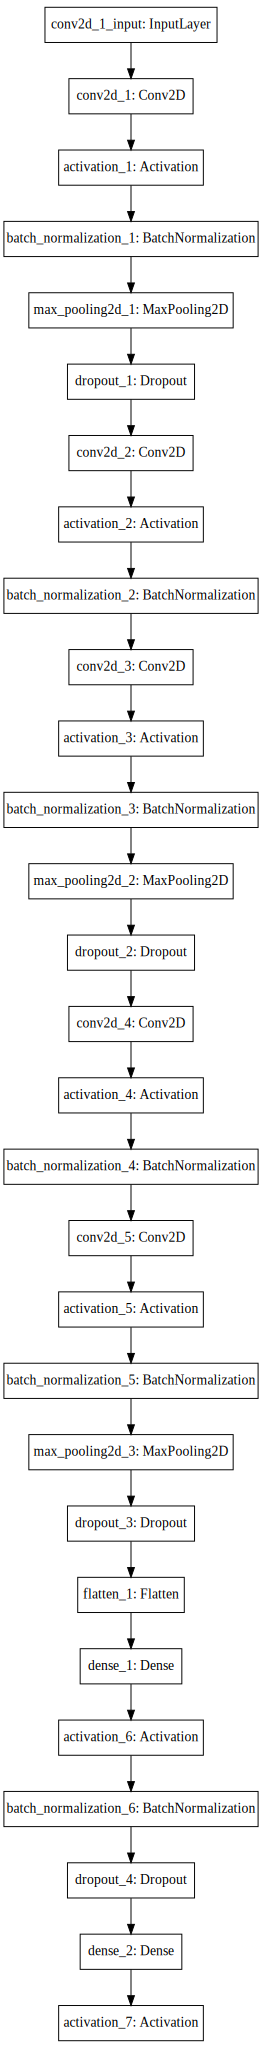

In [9]:
from keras.utils.vis_utils import model_to_dot
SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [10]:
#save the model in mod.png file
plot_model(model, to_file='model.png')
print("Graph saved to disk")

Graph saved to disk


In [11]:
#save the model to yalm
model_yaml = model.to_yaml()
with open("model.yaml", "w") as yaml_file:
    yaml_file.write(model_yaml)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Model saved to disk")


Model saved to disk


In [12]:
# train the network
print("[INFO] training network...")
H = model.fit_generator(
    aug.flow(trainX, trainY, batch_size=BS),
    validation_data=(testX, testY),
    steps_per_epoch=len(trainX) // BS,
    epochs=EPOCHS, verbose=1)

[INFO] training network...
Epoch 1/20
326/326 [==============================] - 678s 2s/step - loss: 0.6229 - acc: 0.8098 - val_loss: 0.5205 - val_acc: 0.8939
Epoch 2/20
326/326 [==============================] - 683s 2s/step - loss: 0.2170 - acc: 0.9279 - val_loss: 0.3057 - val_acc: 0.9261
Epoch 3/20
326/326 [==============================] - 691s 2s/step - loss: 0.2098 - acc: 0.9347 - val_loss: 0.0454 - val_acc: 0.9904
Epoch 4/20
326/326 [==============================] - 649s 2s/step - loss: 0.1101 - acc: 0.9626 - val_loss: 0.0093 - val_acc: 0.9989
Epoch 5/20
326/326 [==============================] - 648s 2s/step - loss: 0.0758 - acc: 0.9757 - val_loss: 0.0630 - val_acc: 0.9766
Epoch 6/20
326/326 [==============================] - 649s 2s/step - loss: 0.0835 - acc: 0.9734 - val_loss: 0.0129 - val_acc: 0.9985
Epoch 7/20
326/326 [==============================] - 650s 2s/step - loss: 0.0833 - acc: 0.9745 - val_loss: 0.1400 - val_acc: 0.9544
Epoch 8/20
326/326 [======================

In [13]:
score = model.evaluate(testX, testY, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2610/2610 [==============================] - 47s 18ms/step
Test loss: 0.019999731061311633
Test accuracy: 0.9915708812260536


# Accuracy/Loss Plots

C:\Users\lynda\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\Users\lynda\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\lynda\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\lynda\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\lynda\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\lynda\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 478, in start
    self.io_loop.start()
  File "C:\Users\lynda\A

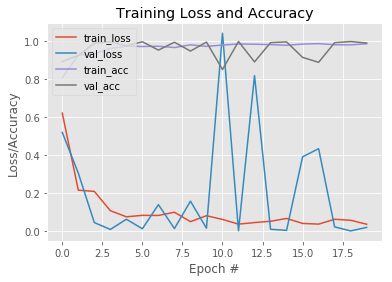

In [14]:
import matplotlib
matplotlib.use("Agg")
#plot the accuracy and the loss per epoch in the same graph
plt.style.use("ggplot")
plt.figure()
N = EPOCHS
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="upper left")
plt.savefig('Accuracy_Loss.png')

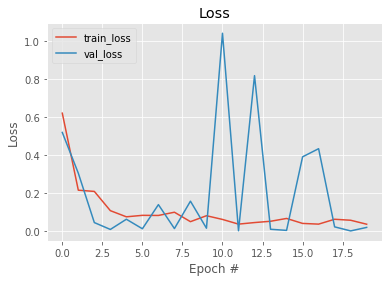

In [15]:
#plot the loss per epoch
plt.style.use("ggplot")
plt.figure()
N = EPOCHS
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.title("Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend(loc="upper left")
plt.savefig('Loss.png')


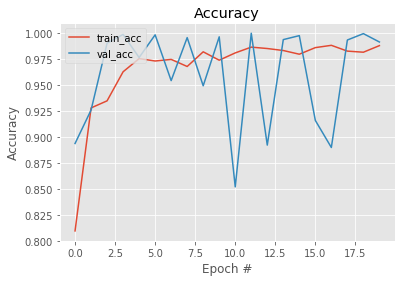

In [16]:
#plot the accuracy per epoch
plt.style.use("ggplot")
plt.figure()
N = EPOCHS
plt.plot(np.arange(0, N), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_acc"], label="val_acc")
plt.title("Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Accuracy")
plt.legend(loc="upper left")
plt.savefig('Accuracy.png')

# Model testing on new images


In [ ]:


# load the image
#image = cv2.imread('./examples/images.jpg')
image = cv2.imread('./examples/fruit.jpg')
output = imutils.resize(image, width=400)
 
# pre-process the image for classification
image = cv2.resize(image, (96, 96))
image = image.astype("float") / 255.0
image = img_to_array(image)
image = np.expand_dims(image, axis=0)
# load the trained convolutional neural network and the multi-label
# binarizer
yaml_file = open('model.yaml', 'r')
loaded_model_yaml = yaml_file.read()
yaml_file.close()
model = model_from_yaml(loaded_model_yaml)
# load weights into new model
model.load_weights("model.h5")
print("Loaded model from disk")
 
mlb = pickle.loads(open('mlb.pickle', "rb").read())

# labels with the *largest* probability
print("[INFO] classifying image...")
proba = model.predict(image)[0]
idxs = np.argsort(proba)[::-1][:4]

# loop over the indexes of the high confidence class labels
for (i, j) in enumerate(idxs):
    # build the label and draw the label on the image
    label = "{}: {:.2f}%".format(mlb.classes_[j], proba[j] * 100)
    cv2.putText(output, label, (10, (i * 30) + 25), 
        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# show the probabilities for each of the individual labels
for (label, p) in zip(mlb.classes_, proba):
    print("{}: {:.2f}%".format(label, p * 100))

# show the output image
cv2.imshow("Result",output)
cv2.waitKey(0)


Loaded model from disk
[INFO] classifying image...
Apple: 3.63%
Apricot: 3.80%
Avocado: 3.54%
Banana: 3.87%
Cactus: 3.85%
Carambula: 3.84%
Cherry: 4.08%
Clementine: 3.41%
Cocos: 3.49%
Grape: 4.15%
Grapefruit: 3.64%
Kiwi: 3.61%
Lemon: 3.63%
Mandarine: 4.18%
Mango: 3.48%
Maracuja: 3.47%
Orange: 3.55%
Papaya: 3.72%
PassionFruit: 3.61%
Peach: 3.72%
Pear: 3.88%
Pineapple: 3.69%
Plum: 3.54%
Pomegranate: 3.82%
Quince: 3.56%
Raspberry: 3.77%
Strawberry: 3.50%
